In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\gusta\OneDrive\Área de Trabalho\Facens\TCC\DataSets\INFLUD23-26-02-2024.csv", delimiter=';')

C:\Users\gusta\AppData\Local\Temp\ipykernel_21760\4056821837.py:1: DtypeWarning: Columns (15,18,20,23,53,59,61,63,72,74,79,91,93,109,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\gusta\OneDrive\Área de Trabalho\Facens\TCC\DataSets\INFLUD23-26-02-2024.csv", delimiter=';')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 190 entries, DT_NOTIFIC to TABAG
dtypes: float64(99), int64(7), object(84)
memory usage: 402.0+ MB


In [4]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_ENC,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG
0,08/02/2023,6,23/01/2023,4,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27/02/2023,9,25/02/2023,8,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17/03/2023,11,12/03/2023,11,SP,GVE XVI BOTUCATU,1341.0,BOTUCATU,350750,HOSPITAL UNIMED BOTUCATU,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21/03/2023,12,18/03/2023,11,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HOSPITAL DO CORACAO UNIDADE BELA SUICA,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/03/2023,13,26/03/2023,13,SC,SAO MIGUEL DO OESTE,1548.0,GUARACIABA,420640,ASSOCIACAO BENEFICIENTE HOSPITAL SAO LUCAS,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'VG_ENC', 'VG_REINF', 'REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI',
       'DOSE_ADIC', 'DOS_RE_BI', 'LOTE_ADIC', 'TABAG'],
      dtype='object', length=190)

# Cleaning

In [6]:
# Supondo que 'df' seja o seu DataFrame original
# Substitua 'df' pelo nome do seu DataFrame

# Calcula a porcentagem de valores nulos em cada coluna
null_percentage = df.isnull().mean() * 100

# Seleciona as colunas com mais de 75% de valores nulos
columns_with_high_null_percentage = null_percentage[null_percentage > 80]
print(columns_with_high_null_percentage)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos
new_df = pd.DataFrame(columns_with_high_null_percentage, columns=['Porcentagem de Nulos'])

new_df.head()


OBES_IMC       99.766321
MORB_DESC      81.270014
DT_UT_DOSE     96.427026
MAE_VAC        93.987104
DT_VAC_MAE     99.789401
                 ...    
FAB_RE_BI      92.585394
DOSE_ADIC      98.195843
DOS_RE_BI      92.580345
LOTE_ADIC      98.218201
TABAG         100.000000
Length: 84, dtype: float64


,Porcentagem de Nulos
OBES_IMC,99.766321
MORB_DESC,81.270014
DT_UT_DOSE,96.427026
MAE_VAC,93.987104
DT_VAC_MAE,99.789401


In [7]:
new_df.sort_values(by='Porcentagem de Nulos')

,Porcentagem de Nulos
MORB_DESC,81.270014
DOSE_2REF,82.651891
FAB_COVRF2,82.680380
LOTE_REF2,82.691919
DT_SAIDUTI,84.037014
...,...
PAIS_VGM,100.000000
DT_TRT_COV,100.000000
DT_VGM,100.000000
VG_REINF,100.000000


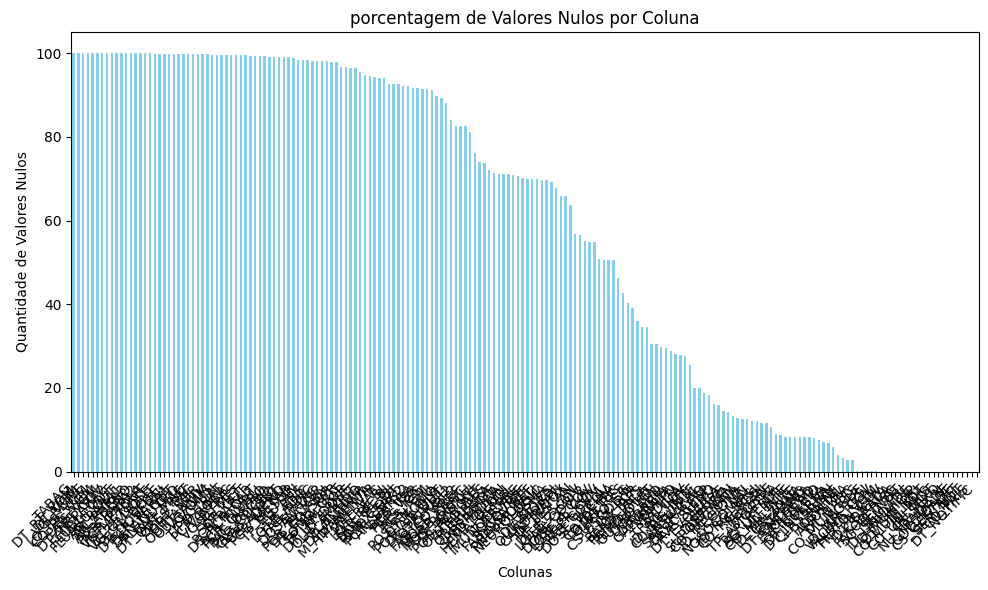

In [8]:
# Cria um gráfico de barras

null_count = (df.isnull().mean()* 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
null_count.plot(kind='bar', color='skyblue')
plt.title('porcentagem de Valores Nulos por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
df_filter = df.copy()

null_percentage = df_filter.isnull().mean() * 100

# Seleciona as colunas com mais de 75% de valores nulos
columns_to_drop = null_percentage[null_percentage > 80].index.tolist()
# print(columns_to_drop)

df_filter.drop(columns=columns_to_drop, inplace=True)

In [10]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 106 entries, DT_NOTIFIC to REINF
dtypes: float64(55), int64(7), object(44)
memory usage: 224.3+ MB


In [13]:
# Verificando para limpar os nulos
df_filter.isna().sum().sort_values(ascending=False)

POS_PCRFLU    211437
DT_ENTUTI     205067
POS_PCROUT    204464
OUTRO_DES     199749
PUERPERA      197928
               ...  
CS_GESTANT         0
ID_PAIS            0
CO_PAIS            0
SEM_NOT            0
DT_NOTIFIC         0
Length: 106, dtype: int64

In [26]:
df_filter.dropna(how='all', inplace=True)
df_filter.isna().sum().sort_values(ascending=False)

POS_PCRFLU    211437
DT_ENTUTI     205067
POS_PCROUT    204464
OUTRO_DES     199749
PUERPERA      197928
               ...  
CS_GESTANT         0
ID_PAIS            0
CO_PAIS            0
SEM_NOT            0
DT_NOTIFIC         0
Length: 106, dtype: int64

In [27]:
df_filter.info(max_cols=107)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Data columns (total 106 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    DT_NOTIFIC  277304 non-null  object 
 1    SEM_NOT     277304 non-null  int64  
 2    DT_SIN_PRI  277304 non-null  object 
 3    SEM_PRI     277304 non-null  int64  
 4    SG_UF_NOT   277304 non-null  object 
 5    ID_REGIONA  242285 non-null  object 
 6    CO_REGIONA  242285 non-null  float64
 7    ID_MUNICIP  277304 non-null  object 
 8    CO_MUN_NOT  277304 non-null  int64  
 9    ID_UNIDADE  277304 non-null  object 
 10   CO_UNI_NOT  277304 non-null  int64  
 11   CS_SEXO     277304 non-null  object 
 12   DT_NASC     277214 non-null  object 
 13   NU_IDADE_N  277304 non-null  int64  
 14   TP_IDADE    277304 non-null  int64  
 15   COD_IDADE   277304 non-null  object 
 16   CS_GESTANT  277304 non-null  int64  
 17   CS_RACA     277303 non-null  float64
 18   CS_ESCOL_N  177561 non

In [28]:
# Quantidade de linhas duplicadas
df_filter.duplicated().sum()

198

In [29]:
# removendo os nulos
df_filter.drop_duplicates(inplace=True)

In [34]:
df_filter[['PUERPERA','PCR_RESUL','CLASSI_FIN']].head(50)

,PUERPERA,PCR_RESUL,CLASSI_FIN
0,2.0,1.0,5.0
1,NaN,1.0,2.0
2,2.0,2.0,4.0
3,NaN,4.0,5.0
4,NaN,2.0,4.0
5,NaN,2.0,4.0
6,2.0,2.0,4.0
7,NaN,2.0,4.0
8,NaN,2.0,4.0
9,NaN,2.0,4.0
